In [ ]:
# Project Dataset
https://www.kaggle.com/datasets/danielgrijalvas/movies

In [111]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plots we will create

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\GonDesktop\Documents\Github\PortfolioProjects\MoviesDataPythonProject.csv')

In [13]:
# Let's Look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [113]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [115]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [117]:
# Replace NaN values with a default value, such as 0
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

# Ensure all entries are numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0)


# Convert the columns to int64 type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [119]:
# Create correct Year column
# df['yearcorrect'] = df['released'].astype(str).str[:4]
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')

In [139]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

In [121]:
# Sort by gross descending

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [123]:
# Allows you to see all data

pd.set_option('display.max_rows', None)

In [125]:
# Drop any duplicates
# df['company'].drop_duplicates().sort_values(ascending = False)
df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [61]:
# Are there any Outliers?

df.boxplot(column=['gross'])

<Axes: >

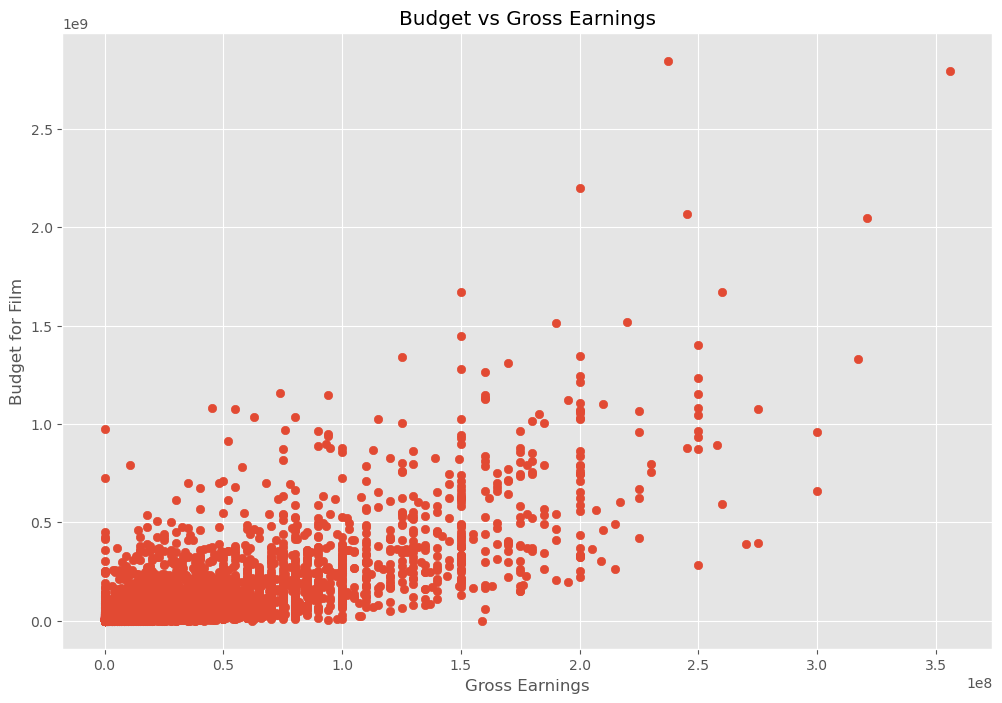

In [71]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

# Titles
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

# Show graphic
plt.show()

In [127]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

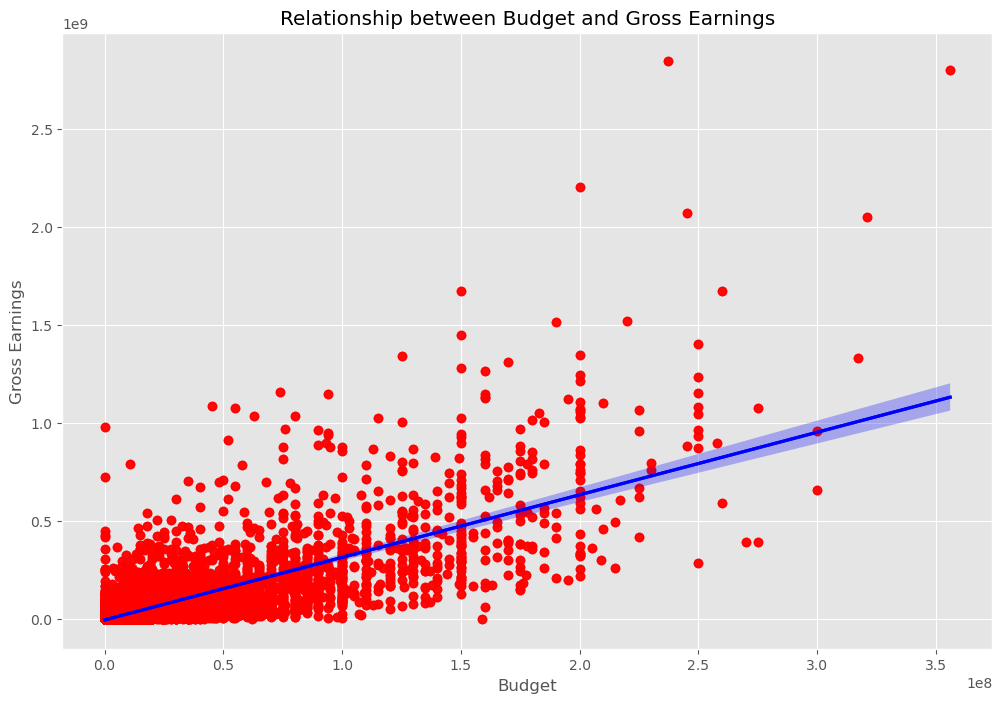

In [75]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue" })

# Titles
plt.title("Relationship between Budget and Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")

# Show graphic
plt.show()

In [81]:
# Let's start looking at correlation

# Only numeric values
numeric_df = df.select_dtypes(include = ['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000


In [93]:
# Calculate pearson correlation
correlation_matrix = numeric_df.corr(method = 'pearson')

print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000


In [ ]:
# High correlation between budget and gross

In [85]:
# Calculate kendall correlation
correlation_matrix = numeric_df.corr(method = 'kendall')

print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.216595  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.560118  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.541956  0.176016
gross    0.216595  0.090626  0.560118  0.541956  1.000000  0.176912
runtime  0.097184  0.283611  0.198240  0.176016  0.176912  1.000000


In [87]:
# Calculate spearman correlation
correlation_matrix = numeric_df.corr(method = 'spearman')

print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.291152  0.314681  0.142977
score    0.099045  1.000000  0.428138 -0.007500  0.132569  0.399857
votes    0.469829  0.428138  1.000000  0.604627  0.752265  0.290159
budget   0.291152 -0.007500  0.604627  1.000000  0.716816  0.246748
gross    0.314681  0.132569  0.752265  0.716816  1.000000  0.256783
runtime  0.142977  0.399857  0.290159  0.246748  0.256783  1.000000


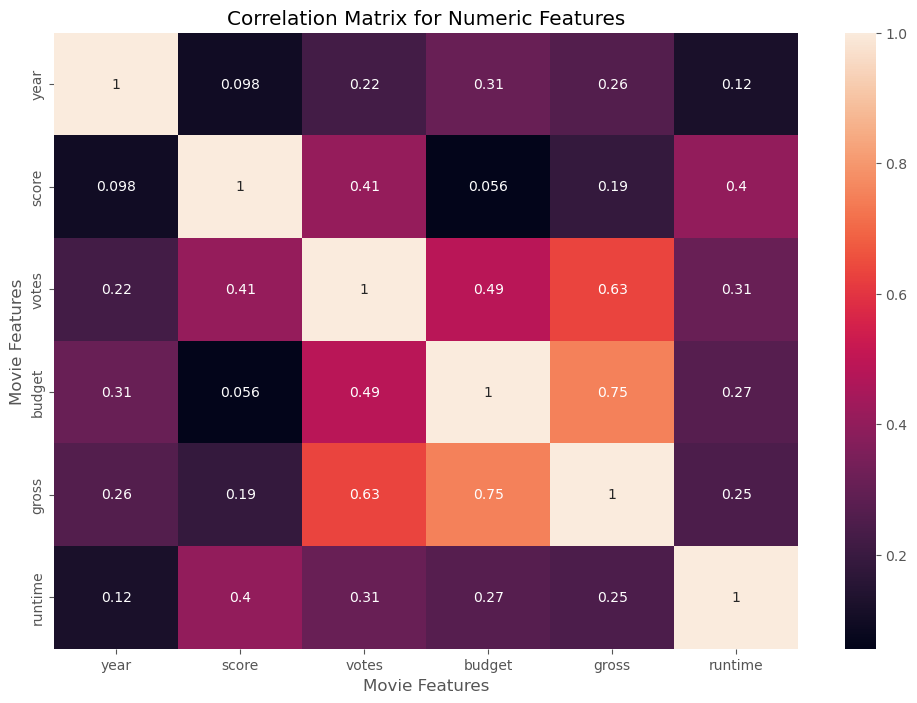

In [97]:
# Calculate pearson correlation
correlation_matrix = numeric_df.corr(method = 'pearson')

# Heatmap of correlation_matrix
sns.heatmap(correlation_matrix, annot = True)

# Titles
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Show graphic
plt.show()

In [141]:
# Create a copy of the original DataFrame to preserve the original data
df_numerized = df

# Iterate through all columns in the DataFrame
for col_name in df_numerized.columns:
    # Check if the column data type is 'object' (i.e., non-numeric, such as strings)
    if df_numerized[col_name].dtype == 'object':
        # Convert the column to a 'category' data type
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        # Replace the column values with their corresponding category codes
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       55  237000000  2847246203     2253    162.0           29  
7445  2241       55  356000000  2797501328     1606    181.0           39  
3045  1595       55  200000000  2201647264     2253    194.0           17  
6663   524       55  245000000  2069521700     1540    138.0           35  
7244  2241       55  321000000  2048359754     1606    149.0           38

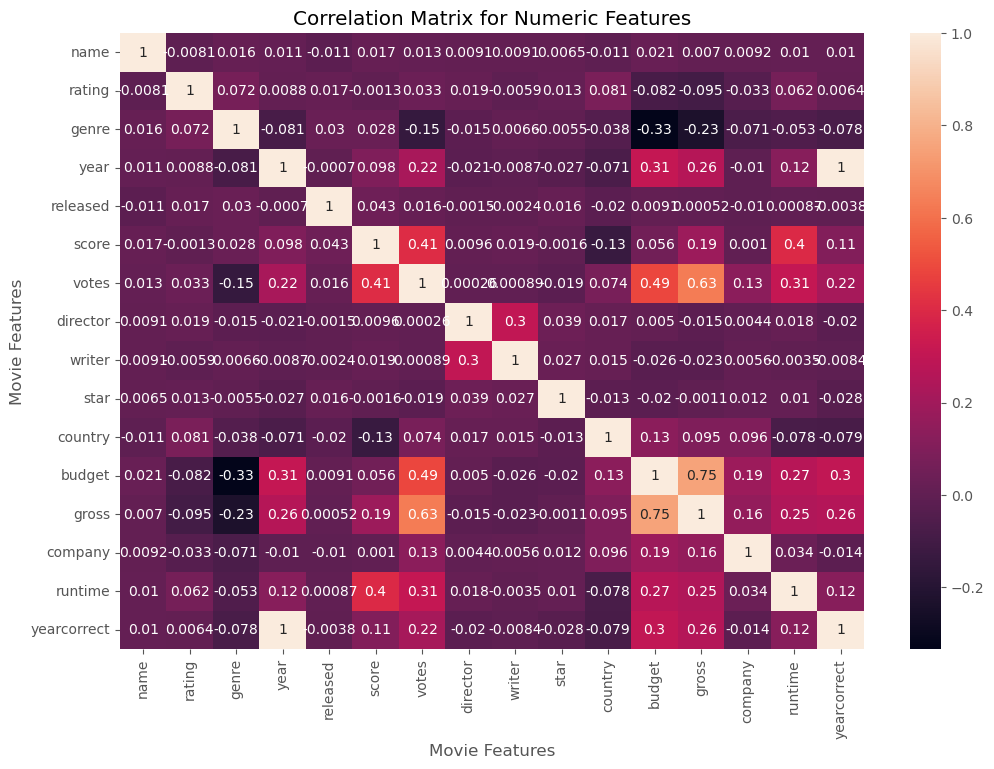

In [131]:
# Calculate pearson correlation
correlation_matrix = df_numerized.corr(method = 'pearson')

# Heatmap of correlation_matrix
sns.heatmap(correlation_matrix, annot = True)

# Titles
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Show graphic
plt.show()

In [133]:
# Compute the correlation matrix for the numerized DataFrame
correlation_mat = df_numerized.corr()

# Unstack the correlation matrix to convert it from a square format (matrix) 
# to a Series format, where each pair of features is listed with its correlation value
corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [137]:
# Sort the correlation pairs in ascending order
sorted_pairs = corr_pairs.sort_values()

# Filter the sorted pairs to include only those with a correlation higher than 0.5
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

gross        votes          0.632834
votes        gross          0.632834
gross        budget         0.750157
budget       gross          0.750157
yearcorrect  year           0.996397
year         yearcorrect    0.996397
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highes correlation to gross earnings

#Company has low correlation

In [ ]:
#Steps
1. Get the data
2. Look into it
3. Define what we wanna do
4. Start Data Cleaning Process
5. Look for duplicate / drop duplicates
6. Look for NULL data / clean NULLs
7. Look column Data type / Change if needed
8. Desing graphics to graphically analyze data
9. Look for correlations